In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd #library untuk dataframe
import numpy as np #library untuk komputasi

#library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#menghilangkan warning
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

#library dataset split dan model
from sklearn.model_selection import train_test_split

#library untuk evaluasi
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Import data ISPU 2021 hasil cleaning

df = pd.read_excel('drive/MyDrive/Model Klasifikasi/ISPU 2021 Hasil Cleaning.xlsx')
df

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-01-01,DKI1 (Bunderan HI),38,53,29,6,31,13,53,PM25,SEDANG
1,2021-01-02,DKI1 (Bunderan HI),27,46,27,7,47,7,47,O3,BAIK
2,2021-01-03,DKI1 (Bunderan HI),44,58,25,7,40,13,58,PM25,SEDANG
3,2021-01-04,DKI1 (Bunderan HI),30,48,24,4,32,7,48,PM25,BAIK
4,2021-01-05,DKI1 (Bunderan HI),38,53,24,6,31,9,53,PM25,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...
1512,2021-12-27,DKI5 (Kebon Jeruk) Jakarta Barat,54,76,36,14,21,47,76,PM25,SEDANG
1513,2021-12-28,DKI5 (Kebon Jeruk) Jakarta Barat,44,68,20,11,21,33,68,PM25,SEDANG
1514,2021-12-29,DKI5 (Kebon Jeruk) Jakarta Barat,34,54,28,8,25,29,54,PM25,SEDANG
1515,2021-12-30,DKI5 (Kebon Jeruk) Jakarta Barat,53,75,25,15,23,44,75,PM25,SEDANG


In [ ]:
df.shape      # Menampilkan dimensi dataset

(1517, 11)

In [ ]:
df.info()     # Menampilkan dtype tiap atribut

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tanggal   1517 non-null   object
 1   stasiun   1517 non-null   object
 2   pm10      1517 non-null   int64 
 3   pm25      1517 non-null   int64 
 4   so2       1517 non-null   int64 
 5   co        1517 non-null   int64 
 6   o3        1517 non-null   int64 
 7   no2       1517 non-null   int64 
 8   max       1517 non-null   int64 
 9   critical  1517 non-null   object
 10  categori  1517 non-null   object
dtypes: int64(7), object(4)
memory usage: 130.5+ KB


In [ ]:
df.categori.value_counts()    # Cek value kolom target

SEDANG         1147
TIDAK SEHAT     245
BAIK            125
Name: categori, dtype: int64

#### Data pre-processing

In [ ]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_encoder=df.copy()
for i in ['categori']:
    df_encoder[i] = label_encoder.fit_transform(df_encoder[i])

df_encoder

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-01-01,DKI1 (Bunderan HI),38,53,29,6,31,13,53,PM25,1
1,2021-01-02,DKI1 (Bunderan HI),27,46,27,7,47,7,47,O3,0
2,2021-01-03,DKI1 (Bunderan HI),44,58,25,7,40,13,58,PM25,1
3,2021-01-04,DKI1 (Bunderan HI),30,48,24,4,32,7,48,PM25,0
4,2021-01-05,DKI1 (Bunderan HI),38,53,24,6,31,9,53,PM25,1
...,...,...,...,...,...,...,...,...,...,...,...
1512,2021-12-27,DKI5 (Kebon Jeruk) Jakarta Barat,54,76,36,14,21,47,76,PM25,1
1513,2021-12-28,DKI5 (Kebon Jeruk) Jakarta Barat,44,68,20,11,21,33,68,PM25,1
1514,2021-12-29,DKI5 (Kebon Jeruk) Jakarta Barat,34,54,28,8,25,29,54,PM25,1
1515,2021-12-30,DKI5 (Kebon Jeruk) Jakarta Barat,53,75,25,15,23,44,75,PM25,1


In [ ]:
df_encoder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tanggal   1517 non-null   object
 1   stasiun   1517 non-null   object
 2   pm10      1517 non-null   int64 
 3   pm25      1517 non-null   int64 
 4   so2       1517 non-null   int64 
 5   co        1517 non-null   int64 
 6   o3        1517 non-null   int64 
 7   no2       1517 non-null   int64 
 8   max       1517 non-null   int64 
 9   critical  1517 non-null   object
 10  categori  1517 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 130.5+ KB


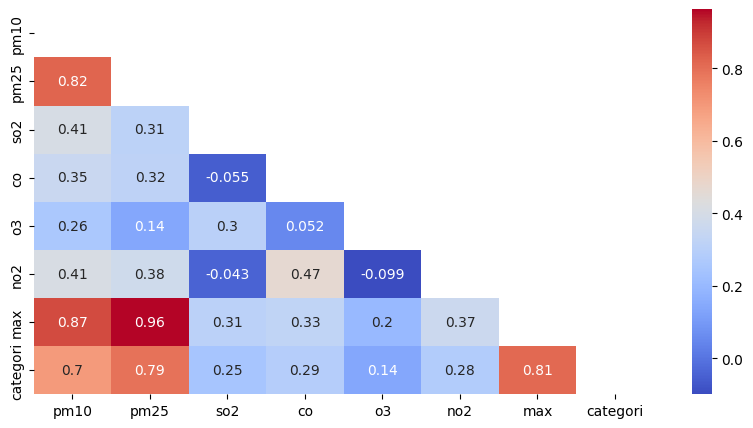

In [ ]:
# Cek korelasi variabel

plt.figure(figsize=(10,5))
corr_matrix = df_encoder.corr(method='pearson', numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm')
plt.show()

In [ ]:
# Normalisasi

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
df_norm = pd.DataFrame(minmax.fit_transform(df.drop(columns=['tanggal','stasiun','critical','max','categori']).values),
                       columns=df.drop(columns=['tanggal','stasiun','critical','max','categori']).columns)
df_norm

,pm10,pm25,so2,co,o3,no2
0,0.140244,0.248447,0.3375,0.097561,0.160839,0.161290
1,0.073171,0.204969,0.3125,0.121951,0.272727,0.064516
2,0.176829,0.279503,0.2875,0.121951,0.223776,0.161290
3,0.091463,0.217391,0.2750,0.048780,0.167832,0.064516
4,0.140244,0.248447,0.2750,0.097561,0.160839,0.096774
...,...,...,...,...,...,...
1512,0.237805,0.391304,0.4250,0.292683,0.090909,0.709677
1513,0.176829,0.341615,0.2250,0.219512,0.090909,0.483871
1514,0.115854,0.254658,0.3250,0.146341,0.118881,0.419355
1515,0.231707,0.385093,0.2875,0.317073,0.104895,0.661290


#### Membagi data set

In [ ]:
X = df_norm
y = df_encoder['categori']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train

,pm10,pm25,so2,co,o3,no2
999,0.231707,0.478261,0.4500,0.146341,0.090909,0.258065
1465,0.146341,0.285714,0.3875,0.292683,0.195804,0.145161
1281,0.243902,0.372671,0.3750,0.292683,0.062937,0.564516
664,0.402439,0.590062,0.8000,0.390244,0.251748,0.516129
602,0.219512,0.428571,0.2500,0.317073,0.125874,0.338710
...,...,...,...,...,...,...
1130,0.195122,0.366460,0.5875,0.121951,0.146853,0.161290
1294,0.073171,0.124224,0.3750,0.121951,0.041958,0.032258
860,0.243902,0.552795,0.4250,0.170732,0.153846,0.241935
1459,0.237805,0.378882,0.4000,0.268293,0.244755,0.193548


In [ ]:
y_train

999     1
1465    1
1281    1
664     2
602     1
       ..
1130    1
1294    0
860     2
1459    1
1126    1
Name: categori, Length: 1213, dtype: int64

In [ ]:
y_train.value_counts()

1    914
2    195
0    104
Name: categori, dtype: int64

In [ ]:
from keras.utils import np_utils
y_train_mlp=np_utils.to_categorical(y_train,num_classes=3)
y_test_mlp=np_utils.to_categorical(y_test,num_classes=3)
print("y_train_mlp",y_train_mlp.shape)
print("y_test_mlp",y_test_mlp.shape)

y_train_mlp (1213, 3)
y_test_mlp (304, 3)


#### Model Train MLP

In [ ]:
import keras
import tensorflow as tf
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation

model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=(6,)))
model.add(tf.keras.layers.Dense(24, activation='relu'))
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                   optimizer='sgd',
                   metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                168       
                                                                 
 dense_1 (Dense)             (None, 12)                300       
                                                                 
 dense_2 (Dense)             (None, 3)                 39        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________


In [ ]:
History = model.fit(X_train, y_train_mlp, epochs = 500, validation_split = 0.2, verbose = 1)

Epoch 1/500
31/31 [==============================] - 0s 13ms/step - loss: 0.1124 - accuracy: 0.9577 - val_loss: 0.1139 - val_accuracy: 0.9465
Epoch 2/500
31/31 [==============================] - 0s 16ms/step - loss: 0.1130 - accuracy: 0.9536 - val_loss: 0.1098 - val_accuracy: 0.9547
Epoch 3/500
31/31 [==============================] - 0s 13ms/step - loss: 0.1139 - accuracy: 0.9557 - val_loss: 0.1103 - val_accuracy: 0.9506
Epoch 4/500
31/31 [==============================] - 0s 11ms/step - loss: 0.1141 - accuracy: 0.9495 - val_loss: 0.1200 - val_accuracy: 0.9424
Epoch 5/500
31/31 [==============================] - 0s 14ms/step - loss: 0.1147 - accuracy: 0.9536 - val_loss: 0.1170 - val_accuracy: 0.9424
Epoch 6/500
31/31 [==============================] - 0s 11ms/step - loss: 0.1140 - accuracy: 0.9557 - val_loss: 0.1113 - val_accuracy: 0.9506
Epoch 7/500
31/31 [==============================] - 0s 13ms/step - loss: 0.1134 - accuracy: 0.9536 - val_loss: 0.1113 - val_accuracy: 0.9506
Epoch 

In [ ]:
history_df = pd.DataFrame(History.history)
history_df['epoch'] = History.epoch
history_df

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.112431,0.957732,0.113944,0.946502,0
1,0.112977,0.953608,0.109750,0.954733,1
2,0.113877,0.955670,0.110284,0.950617,2
3,0.114070,0.949485,0.120032,0.942387,3
4,0.114707,0.953608,0.117008,0.942387,4
...,...,...,...,...,...
495,0.085462,0.967010,0.088659,0.962963,495
496,0.085864,0.962887,0.087558,0.962963,496
497,0.087194,0.960825,0.087662,0.954733,497
498,0.086461,0.961856,0.096111,0.946502,498


In [ ]:
history_df.to_excel('History Klasifikasi MLP.xlsx', index=False)

In [ ]:
# Bobot MLP

for i, layer in enumerate(model.layers):
  print(f"Weights of Layer {i}")
  print(layer.get_weights()[0])

Weights of Layer 0
[[-0.11871615  0.2920935  -0.3060595   0.33952892  0.25884244 -0.1841421
   0.7617197  -0.12643883  0.22036232 -0.4025118   0.00911185  1.0152949
  -0.3661793  -0.2669793  -0.42539886  1.0267844   0.24047378  0.11955134
  -0.4346634   0.6230977   0.5075176   1.24194     0.47378212  0.0619748 ]
 [-0.5243782   1.4063352   0.54674995  1.230749    0.7843847  -0.5966059
   0.8703591  -0.05911987  0.16728354 -0.6975825  -0.21373998  0.8952343
   0.744425   -1.2705915   0.5487846   1.0168408  -0.68364745 -0.15776388
   0.14241953 -0.24212757  1.4332232   1.018085    1.7375147  -0.06283411]
 [ 0.3183617   0.33711106  0.41031212  0.07221373  0.37078416  1.0591309
   0.11268208  0.33026633  0.20289493  0.13603388 -0.25047243  0.27272874
   0.24999432  0.5347812   0.07895025  0.1170341   0.3513341  -0.04341848
  -0.2984166   0.13287577  0.04650326  0.22577517  0.35876352  0.37252548]
 [-0.22348198 -0.23757276 -0.40374     0.28458634 -0.11955195 -0.0298613
   0.48613068 -0.07680

In [ ]:
# Bias MLP

for layer in model.layers:
    if hasattr(layer, 'bias'):
        print(layer.get_weights()[1])

[ 0.8117029  -0.17576687  0.18931495 -0.9324074   0.0246883  -0.1656056
 -0.297728    0.6119626  -0.10323215  0.50591034 -0.02268617  0.12051059
  0.25130013  1.039029   -0.10637978 -0.07838567  0.7266752  -0.02773992
  0.08771194 -0.23924349 -0.3288995  -0.4826093  -0.8279677   0.16312316]
[ 1.0518193e-03 -2.7849704e-01  0.0000000e+00  3.4370596e-04
 -6.5226853e-02  3.5516676e-01 -8.8970885e-02  0.0000000e+00
 -3.2318834e-02  1.7087735e-01  1.2279915e+00 -8.4909046e-01]
[ 0.3679148   0.26939666 -0.63731533]


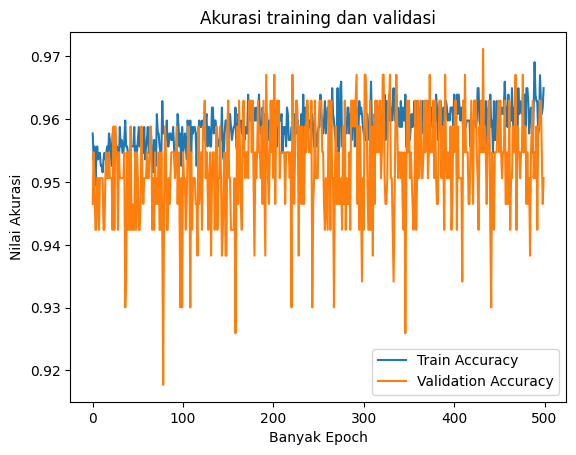

In [ ]:
plt.plot(History.history['accuracy'], label='Train Accuracy')
plt.plot(History.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi training dan validasi')
plt.ylabel('Nilai Akurasi')
plt.xlabel('Banyak Epoch')
plt.legend(loc="lower right")
plt.show()

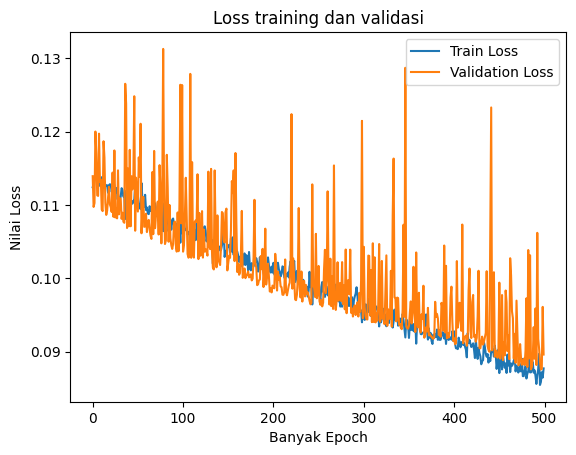

In [ ]:
plt.plot(History.history['loss'], label='Train Loss')
plt.plot(History.history['val_loss'], label='Validation Loss')
plt.title('Loss training dan validasi')
plt.ylabel('Nilai Loss')
plt.xlabel('Banyak Epoch')
plt.legend(loc="upper right")
plt.show()

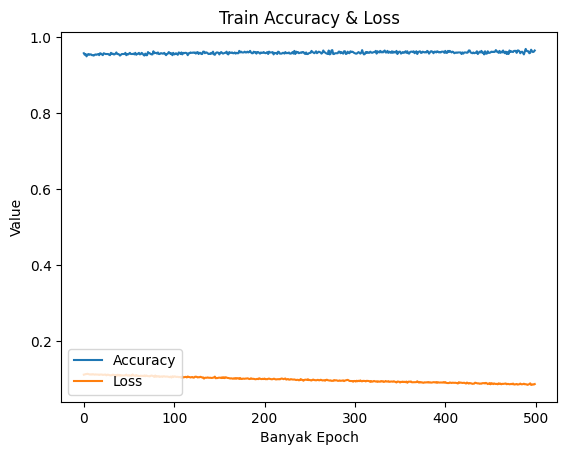

In [ ]:
plt.plot(History.history['accuracy'], label='Accuracy')
plt.plot(History.history['loss'], label='Loss')
plt.title('Train Accuracy & Loss')
plt.ylabel('Value')
plt.xlabel('Banyak Epoch')
plt.legend(loc="lower left")
plt.show()

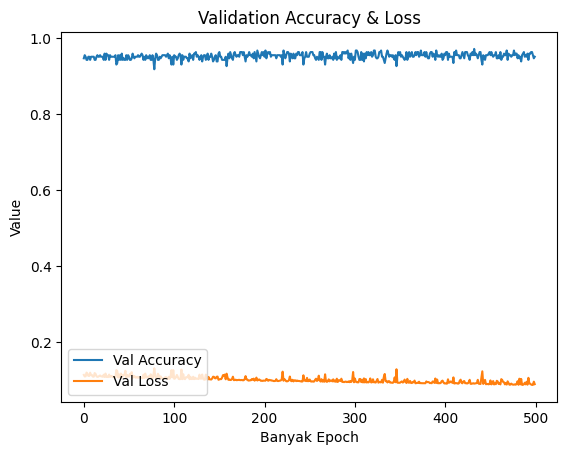

In [ ]:
plt.plot(History.history['val_accuracy'], label='Val Accuracy')
plt.plot(History.history['val_loss'], label='Val Loss')
plt.title('Validation Accuracy & Loss')
plt.ylabel('Value')
plt.xlabel('Banyak Epoch')
plt.legend(loc="lower left")
plt.show()

#### Evaluasi Model (test set)

In [ ]:
y_pred = model.predict(X_test)
y_pred

10/10 [==============================] - 0s 2ms/step


array([[2.82159777e-17, 3.39480516e-06, 9.99996603e-01],
       [2.14277360e-08, 9.99574006e-01, 4.26048238e-04],
       [2.82705551e-17, 4.31445187e-05, 9.99956787e-01],
       [1.04901796e-10, 5.27531326e-01, 4.72468525e-01],
       [9.94612649e-02, 9.00537252e-01, 1.47761261e-06],
       [9.73045303e-07, 9.99989688e-01, 9.30364149e-06],
       [4.20240759e-10, 9.99013841e-01, 9.86028812e-04],
       [2.59510333e-08, 9.86524582e-01, 1.34753734e-02],
       [4.17777010e-05, 9.99956310e-01, 1.92223251e-06],
       [9.76291776e-01, 2.37081368e-02, 2.25229382e-08],
       [2.01261798e-07, 9.99342144e-01, 6.57569151e-04],
       [4.37345619e-07, 9.99996006e-01, 3.46277989e-06],
       [1.64750551e-14, 1.90926145e-03, 9.98090625e-01],
       [8.09873454e-04, 9.99184191e-01, 5.97211329e-06],
       [2.48589721e-02, 9.75139022e-01, 1.94388190e-06],
       [5.51220894e-01, 4.48779017e-01, 9.60978497e-09],
       [1.09983703e-04, 9.99889076e-01, 8.20294360e-07],
       [2.18780833e-08, 9.99952

In [ ]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df

,0,1,2
0,2.821598e-17,0.000003,9.999966e-01
1,2.142774e-08,0.999574,4.260482e-04
2,2.827056e-17,0.000043,9.999568e-01
3,1.049018e-10,0.527531,4.724685e-01
4,9.946126e-02,0.900537,1.477613e-06
...,...,...,...
299,3.748731e-05,0.999952,1.009599e-05
300,2.017597e-08,0.999786,2.142468e-04
301,9.185357e-01,0.081464,5.771767e-09
302,9.034689e-01,0.096531,1.073065e-08


In [ ]:
y_test_fix = np.argmax(y_test_mlp, axis=1)
y_pred_fix = np.argmax(y_pred, axis=1)
y_pred_fix

array([2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1,
       1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 0, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
cm = confusion_matrix(y_test_fix, y_pred_fix)
cm

array([[ 19,   2,   0],
       [  3, 230,   0],
       [  0,   3,  47]])

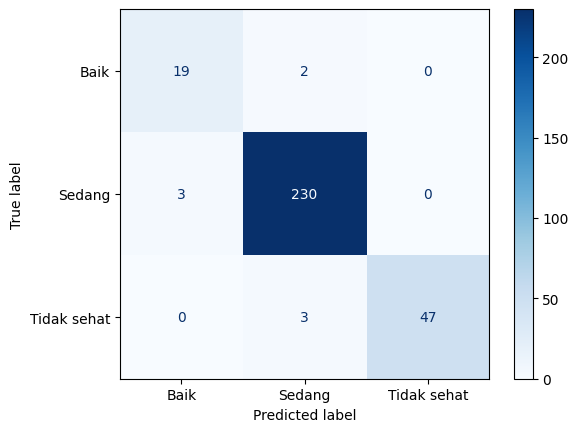

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Baik', 'Sedang', 'Tidak sehat'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(classification_report(y_test_fix, y_pred_fix))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.98      0.99      0.98       233
           2       1.00      0.94      0.97        50

    accuracy                           0.97       304
   macro avg       0.95      0.94      0.95       304
weighted avg       0.97      0.97      0.97       304



In [ ]:
model.save(f'Model Klasifikasi MLP.h5')

In [ ]:
acc  = accuracy_score(y_test_fix, y_pred_fix)
prec = precision_score(y_test_fix, y_pred_fix, average='macro')
rec = recall_score(y_test_fix, y_pred_fix, average='macro')
f1 = f1_score(y_test_fix, y_pred_fix, average='macro')

In [ ]:
df_skor = pd.DataFrame({'Accuracy':[acc],
                       'Precision':[prec],
                       'Recall':[rec],
                       'F1_Score':[f1],
                       'Model':['Klasifikasi MLP']})
df_skor = df_skor.set_index(df_skor['Model']).drop(columns=['Model'])
df_skor.T

Model,Klasifikasi MLP
Accuracy,0.973684
Precision,0.947453
Recall,0.943962
F1_Score,0.945233
